In [1]:
import google.auth
from google.cloud import bigquery as bq

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_gbq as pdq
import seaborn as sns

project_id = 'infusionsoft-looker-poc'
df = pdq.read_gbq("SELECT * FROM `asu_msba_save_probability.CONFIDENTIAL_save_requests_table`",
                  project_id=project_id,
                  dialect='standard'
)
df.head(10)

,app_name,created_date,sales_cohort_date,edition_category,sales_channel,billing_frequency,case_owner,billing_day,calls_connected,calls_attempted,...,number_of_employees,years_in_business,region,refinery_generic_real_estate_flag,refinery_real_estate_flag,refinery_generic_insurance_flag,industry,days_on_book,closed_lost_rev_diff,target_saved
0,hc370,2018-11-27 18:41:44,2017-05-18,Essentials,Direct Sales,Monthly,Austin Geist,20.0,2.0,1.0,...,2 to 3,1 to 2 Years,APAC,0.0,0.0,0.0,Software and Technology,558.750000,NaN,1
1,yn308,2019-01-17 12:58:36,2016-03-28,Complete,Direct Sales,Monthly,Wes Whittaker,28.0,2.0,0.0,...,4 to 10,5 or More Years,Noram East,0.0,0.0,0.0,Professional Services,1025.500000,NaN,1
2,pu562,2019-01-02 12:41:28,2018-10-04,Classic UI,Partner Sales,Monthly,Nathan Campbell,4.0,3.0,0.0,...,2 to 3,5 or More Years,Noram East,0.0,0.0,0.0,None,90.500000,NaN,1
3,dw110,2018-12-11 10:09:53,2012-07-31,Premier,Partner Sales,Monthly,Summar Porter,31.0,1.0,0.0,...,26 to 99,5 or More Years,Noram West,0.0,0.0,0.0,Construction & Engineering,2324.416667,NaN,1
4,ut110,2019-01-11 16:34:45,2012-07-31,Plus,Partner Sales,Monthly,John McDowell,31.0,2.0,0.0,...,None,5 or More Years,Noram West,0.0,0.0,0.0,None,2355.666667,NaN,1
5,lh110,2018-01-09 13:19:45,2012-07-31,Plus,None,Monthly,Chuck Hilbran,31.0,NaN,NaN,...,4 to 10,None,APAC,0.0,0.0,0.0,Software and Technology,1988.541667,NaN,1
6,bizaccel,2018-04-17 12:16:14,2009-06-29,Starter,None,Monthly,John McDowell,29.0,2.0,0.0,...,4 to 10,None,Noram East,0.0,0.0,0.0,Professional Services,3214.500000,NaN,1
7,davefarrow,2018-10-23 15:43:15,2009-06-29,Classic UI,None,Monthly,Danny Diede,29.0,0.0,1.0,...,4 to 10,No Answer,Noram East,0.0,0.0,0.0,Professional Services,3403.625000,NaN,1
8,bobbritton,2018-04-14 05:00:35,2008-12-03,Legacy,None,Monthly,Chuck Hilbran,3.0,NaN,NaN,...,4 to 10,5 or More Years,Noram East,0.0,0.0,0.0,Software and Technology,3419.208333,NaN,1
9,kn166,2018-06-14 07:16:45,2013-12-17,Essentials,None,Monthly,Taylor Barnette,21.0,NaN,NaN,...,None,None,EMEA,NaN,NaN,NaN,None,1640.291667,NaN,1


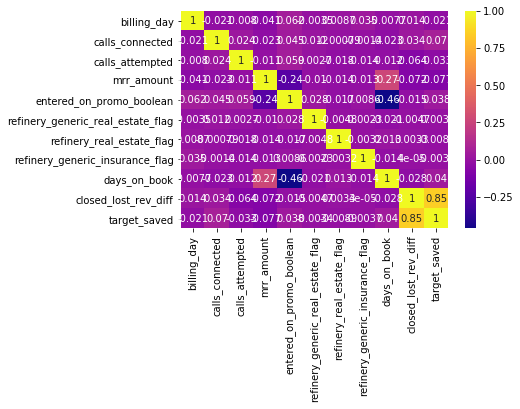

In [41]:
sns.heatmap(df.corr(), annot=True, cmap='plasma')

In [9]:
X = df.drop('target_saved', axis=1)
y = df['target_saved']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target_saved, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2)

In [30]:
# KFold : Training and Validation set
from sklearn.model_selection import KFold
kf = KFold(n_splits=2)
# print(kf.split(Xtrain))
# print(Xtrain.iloc[8852][:])
# Xtrain_splits = kf.get_n_splits(Xtrain)
for train_index, test_index in kf.split(Xtrain):
#     print("TRAIN:", train_index, "TEST:", test_index)
    X_train = Xtrain[train_index.min():train_index.max()][:]
    X_test = Xtrain[test_index.min():test_index.max()][:]
    y_train = ytrain[train_index.min():train_index.max()][:]
    y_test = ytrain[test_index.min():test_index.max()][:]


TRAIN: [ 8852  8853  8854 ... 17701 17702 17703] TEST: [   0    1    2 ... 8849 8850 8851]
17703
TRAIN: [   0    1    2 ... 8849 8850 8851] TEST: [ 8852  8853  8854 ... 17701 17702 17703]
8851


In [31]:
X_train.isna().sum()

app_name                                0
created_date                            0
sales_cohort_date                       0
edition_category                        0
sales_channel                         310
billing_frequency                       0
case_owner                              0
billing_day                             0
calls_connected                      3620
calls_attempted                      3620
mrr_amount                           1505
entered_on_promo_boolean                0
cancel_request_type                     0
cancel_request_reason                6275
lost_revenue_date                    1530
closed_date                             0
region_2                              181
number_of_employees                  2126
years_in_business                    2847
region                                181
refinery_generic_real_estate_flag    3471
refinery_real_estate_flag            3471
refinery_generic_insurance_flag      3471
industry                          

In [46]:
X_train[['mrr_amount', 'edition_category']]

,mrr_amount,edition_category
8820,99.00,Classic UI
460,NaN,Classic UI
900,NaN,Complete
18129,299.00,Complete
18114,199.00,Deluxe Sales
17515,NaN,Essentials
22090,229.00,Deluxe E-Commerce
19288,99.00,Classic UI
13769,134.00,Starter
14338,239.00,Complete


In [47]:
# X_train[X_train['mrr_amount']<0][['app_name', 'created_date', 'sales_cohort_date', 'mrr_amount']]
X_train[X_train['mrr_amount'].isna()]['edition_category']

460             Classic UI
900               Complete
17515           Essentials
1838                New UI
3321               Starter
604             Essentials
2096               Starter
2764               Starter
2940              Complete
1345              Complete
2468               Starter
3364               Starter
1807                New UI
3083              Complete
33                 Starter
895                Starter
2558                  Plus
1239               Starter
3233               Starter
83                 Starter
3376                New UI
953                Starter
92                Complete
3598            Classic UI
3276              Complete
2174     Deluxe E-Commerce
1986              Complete
1326     Deluxe E-Commerce
911             Classic UI
3195               Starter
               ...        
1428            Essentials
40       Deluxe E-Commerce
2026            Classic UI
2284               Starter
3090               Starter
2407              Complete
1

In [73]:
a = X_train[['edition_category', 'mrr_amount']].groupby('edition_category').mean()['mrr_amount']
df = pd.DataFrame(a)
df

,mrr_amount
edition_category,
Classic UI,171.009299
Complete,299.123626
Deluxe E-Commerce,253.239806
Deluxe Sales,269.151055
Elite,967.250000
Enterprise,1803.000000
Essentials,207.055305
Legacy,285.288710
New 2019,61.500000


In [74]:
from sklearn.impute import SimpleImputer
si_mrr = SimpleImputer(missing_values=np.nan, strategy="mean", fill_value=None)
X_train_mrr_imp = pd.DataFrame(si_mrr.fit_transform(X_train[['mrr_amount']]), columns=['mrr_amount_imp'])
X_train_mrr_imp.sample(frac=0.02)
X_train = pd.concat([X_train, X_train_mrr_imp], axis=1)


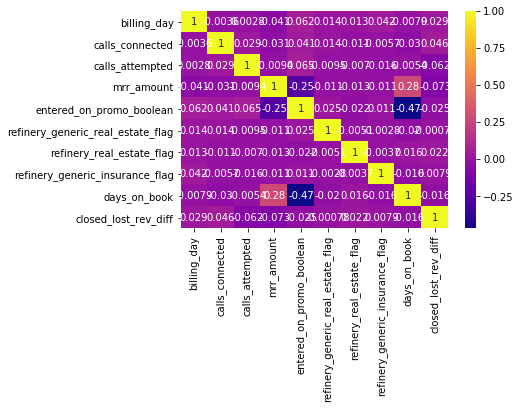

In [40]:
#univariate analysis
sns.heatmap(X_train.corr(), annot=True, cmap='plasma')

In [39]:
# from sklearn.preprocessing import KBinsDiscretizer
# kbd = KBinsDiscretizer(n_bins=20, encode='ordinal', strategy='quantile')
# X_train_kbd = pd.DataFrame(kbd.fit_transform(X_train[['mrr_amount']]), index=X_train.index, columns=['mrr_amount_kbd'])
# kbd.bin_edges_